## Exercises II - Challenge
### Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

In [8]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.preprocessing

from scipy import stats

from env import host, user, password

import warnings
warnings.filterwarnings("ignore")

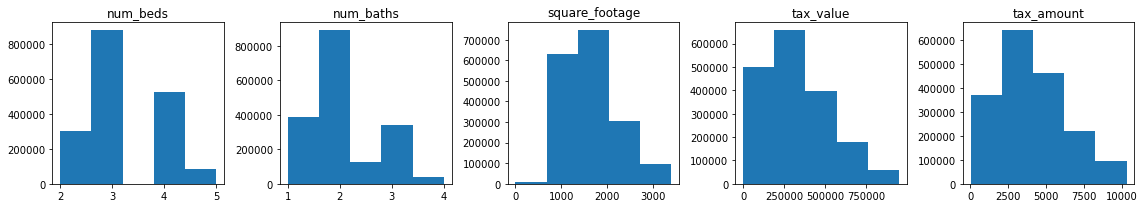

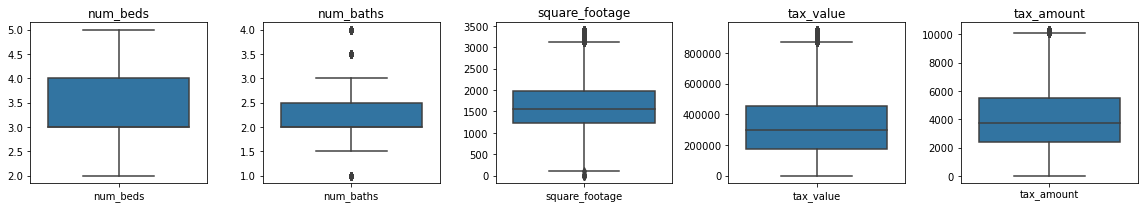

In [4]:
from wrangle import wrangle_zillow 

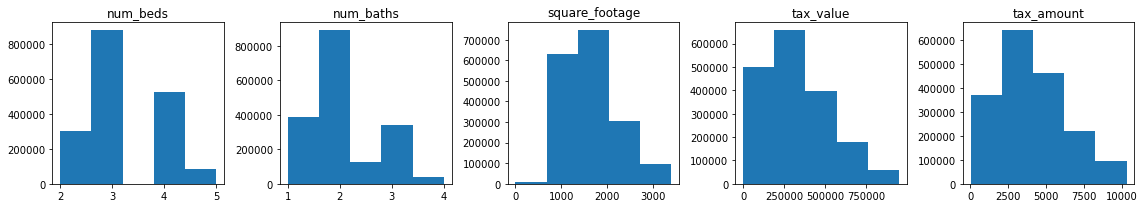

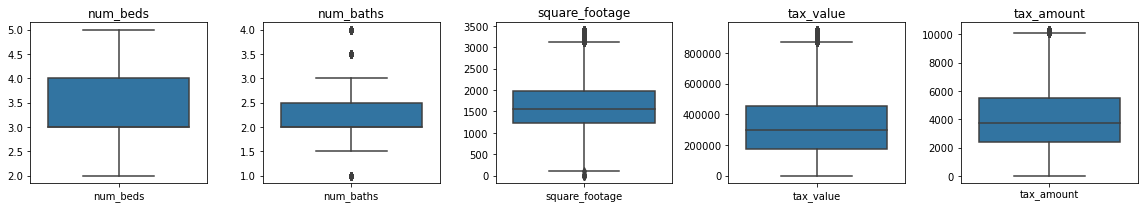

In [5]:
train, validate, test = wrangle_zillow()

In [6]:
train.head()

,num_beds,num_baths,square_footage,tax_value,year_built,tax_amount,fips
1852198,4.0,2.0,1986.0,267140.0,1963.0,2824.78,6111.0
126219,3.0,1.0,877.0,82067.0,1953.0,1235.32,6059.0
855070,4.0,3.0,1972.0,159374.0,1942.0,2091.75,6037.0
1569772,4.0,2.0,1309.0,497923.0,1956.0,5623.58,6059.0
80997,3.0,2.0,1512.0,205712.0,1951.0,2729.58,6037.0


In [7]:
train.shape, validate.shape, test.shape

((1002739, 7), (429746, 7), (358122, 7))

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002739 entries, 1852198 to 612098
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   num_beds        1002739 non-null  float64
 1   num_baths       1002739 non-null  float64
 2   square_footage  1002739 non-null  float64
 3   tax_value       1002739 non-null  float64
 4   year_built      1002739 non-null  object 
 5   tax_amount      1002739 non-null  float64
 6   fips            1002739 non-null  object 
dtypes: float64(5), object(2)
memory usage: 61.2+ MB


1. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [61]:
cat_var = train[['year_built', 'fips']]

In [62]:
cat_var.head()

,year_built,fips
1852198,1963.0,6111.0
126219,1953.0,6059.0
855070,1942.0,6037.0
1569772,1956.0,6059.0
80997,1951.0,6037.0


In [63]:
quant_var = train[['num_beds', 'num_baths', 'square_footage', 'tax_value', 'tax_amount']]

In [64]:
quant_var.head()

,num_beds,num_baths,square_footage,tax_value,tax_amount
1852198,4.0,2.0,1986.0,267140.0,2824.78
126219,3.0,1.0,877.0,82067.0,1235.32
855070,4.0,3.0,1972.0,159374.0,2091.75
1569772,4.0,2.0,1309.0,497923.0,5623.58
80997,3.0,2.0,1512.0,205712.0,2729.58


In [75]:
def explore_univariate_categoraical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='lightseagreen')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='lightseagreen')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats
    
def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table

In [76]:
def explore_univariate(train, cat_var, quant_var):
    for var in cat_vars:
        explore_univariate_categoraical(train, var)
        print('_________________________________________________________________')
    for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(train, col)
        plt.show(p)
        print(descriptive_stats)

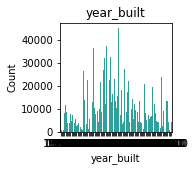

        year_built  Count  Percent
1955.0      1963.0  44894     4.48
1950.0      1953.0  37349     3.72
1954.0      1942.0  36482     3.64
1953.0      1956.0  32623     3.25
1956.0      1951.0  32231     3.21
...            ...    ...      ...
1933.0      1983.0   1112     0.11
1934.0      1916.0    992     0.10
1916.0      1933.0    957     0.10
1918.0      2005.0    846     0.08
1917.0      1917.0    725     0.07

[92 rows x 3 columns]
_________________________________________________________________


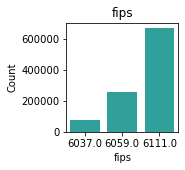

          fips   Count  Percent
6037.0  6111.0  667406    66.56
6059.0  6059.0  256208    25.55
6111.0  6037.0   79125     7.89
_________________________________________________________________


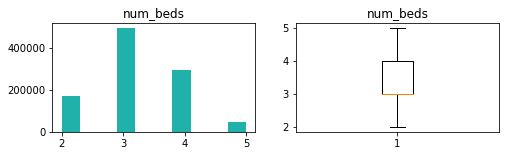

count    1.002739e+06
mean     3.219189e+00
std      7.771718e-01
min      2.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: num_beds, dtype: float64


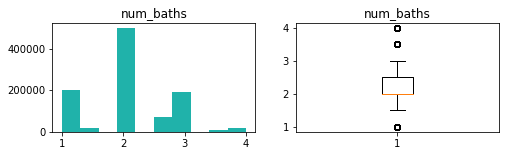

count    1.002739e+06
mean     2.060973e+00
std      7.000038e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.500000e+00
max      4.000000e+00
Name: num_baths, dtype: float64


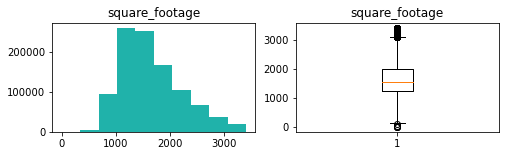

count    1.002739e+06
mean     1.654006e+03
std      5.621084e+02
min      1.000000e+00
25%      1.233000e+03
50%      1.549000e+03
75%      1.986000e+03
max      3.410000e+03
Name: square_footage, dtype: float64


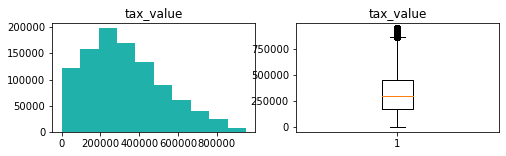

count    1.002739e+06
mean     3.280953e+05
std      1.977193e+05
min      2.200000e+01
25%      1.747765e+05
50%      2.976180e+05
75%      4.517860e+05
max      9.509400e+05
Name: tax_value, dtype: float64


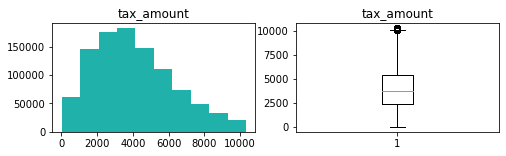

count    1.002739e+06
mean     4.066840e+03
std      2.223105e+03
min      1.872000e+01
25%      2.379780e+03
50%      3.751330e+03
75%      5.474160e+03
max      1.032943e+04
Name: tax_amount, dtype: float64


In [77]:
explore_univariate(train, cat_vars, quant_vars)

2. Come up with some initial hypotheses based on your goal of predicting property value.

3. Visualize all combinations of variables in some way.

4. Run the appropriate statistical tests where needed.

5. What independent variables are correlated with the dependent variable, home value?

6. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?



7. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.